# Using Machine learning

When using ML, we will usually rely on off-the-shelf implementations such as in [Scikit Learn](https://scikit-learn.org/stable/). To install this, do `pip install sklearn`

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
iris = pd.read_csv('data/iris.data', header=None, 
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

Text(0.5, 1.0, 'Sepal length vs width')

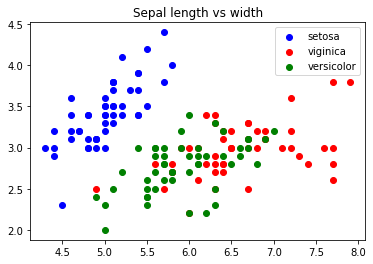

In [4]:
# Idea: when we look at the ground truth, these look easily classifiable by simple algorithms
setosa = iris[iris['class'] == 'Iris-setosa']
virginica = iris[iris['class'] == 'Iris-virginica']
versicolor = iris[iris['class'] == 'Iris-versicolor']

plt.scatter(x=setosa['sepal_length'], y=setosa['sepal_width'], color='b')
plt.scatter(x=virginica['sepal_length'], y=virginica['sepal_width'], color='r')
plt.scatter(x=versicolor['sepal_length'], y=versicolor['sepal_width'], color='g')
plt.legend(['setosa', 'viginica', 'versicolor'])
plt.title("Sepal length vs width")

In [5]:
# construct a classifier object
# then will need to be trained, or "fit"
knn = KNeighborsClassifier(n_neighbors = 3)

# to do that, need to pass an array of data points
# and an array of labels for each of those points

# extract the two columns we want to classify on as a numpy array
X = iris[['sepal_length', 'sepal_width']].values
#print(X)

# iris labels
Y = iris['class']

# we have the labels as strings, just map to numbers
# We will set setosa to class 0
# We wil set the non-setosa to class 1

#replace Iris-setosa entries with 0, and non Iris-setosa entries with 1
Y[Y == 'Iris-setosa'] = 0
Y[Y!= 0] = 1
#print(Y)

# because Y started as strings, they were stored as generic object
# so we will covert them to be stored as floats
Y = Y.astype('float64')
Y

# fit/train the model/algorithm/classifier/ to the data and labels
knn.fit(X,Y)

# we can now ask the knn to classify new points!
# They call this 'predict'
# the .predict() method needs an input matrix of the same cols as X
# will return an array of predicted labels, one for each row
knn.predict([ [7,2.5], [5,2.9], [5,2.7] ])

/var/folders/w_/t6sc02_j38d3q0mks_79m4j40000gn/T/ipykernel_43545/4243345768.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == 'Iris-setosa'] = 0
/var/folders/w_/t6sc02_j38d3q0mks_79m4j40000gn/T/ipykernel_43545/4243345768.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y!= 0] = 1


array([1., 0., 1.])

In [7]:
# see how confused this alg is
knn.predict(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
Y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
Name: class, Length: 150, dtype: float64

In [7]:
num_wrong = np.sum(np.not_equal(knn.predict(X), Y))
print(f'We got {num_wrong} wrong!')

We got 1 wrong!


## We also usually want to see a decision boundary or regions of each class

One way, use contour plotting to just classify the whole grid. 
The easiest way to do this is use `pyplot.contourf` to fill in the areas between grid points,
using `numpy.meshgrid` to generate the grid points themselves.

In [8]:
def f(x,y):
    return 2*x + 1*y

def g(x,y):
    return 10 * (x-4)**2 + 13 * (y-4)**2

In [9]:
# make sure grid contains all of our data
r_min = np.min(X) - 1
r_max = np.max(X) + 1

In [10]:
# in each of these, the i,j element stores the x or y value respectively corresponding to coordinates (i,j)
xs, ys = np.meshgrid(np.arange(r_min, r_max, 0.1), np.arange(r_min, r_max, 0.1))

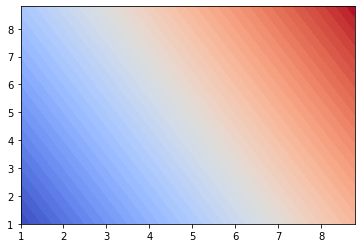

In [11]:
zs = [ [ f(xs[i,j], ys[i,j]) for j in range(len(ys)) ] for i in range(len(xs)) ]
plt.contourf(xs, ys, zs, levels = 50, cmap = 'coolwarm')

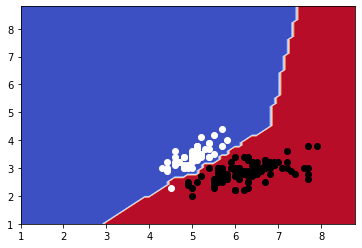

In [12]:
def predict(x,y):
    return knn.predict([[x,y]])[0] # extract single label

zs = [ [ predict(xs[i,j], ys[i,j]) for j in range(len(ys)) ] for i in range(len(xs)) ]
plt.contourf(xs, ys, zs, levels = 50, cmap = 'coolwarm')
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c = 'w')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c = 'k')

# Now try with a support vector machine (SVM)

In [ ]:
clf = SVC(kernal = 'poly', degree = 10)
clf.fit(X,Y)

In [6]:
# for lab
v = np.array([1,1])
np.sqrt(np.sum(v**2))

np.linalg.norm(v)

1.4142135623730951